# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/avnit/PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "C:/Users/avnit/PyBer_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
Total_Rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_Rides=pd.DataFrame(Total_Rides)
Total_Rides.reset_index(inplace = True)
Total_Rides

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


In [6]:
# 2. Get the total drivers for each city type
Total_Drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers=pd.DataFrame(Total_Drivers)
Total_Drivers.reset_index(inplace=True)
Total_Drivers

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


In [7]:
#  3. Get the total amount of fares for each city type
Total_Fares=pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares = pd.DataFrame(Total_Fares) 
Total_Fares.reset_index(inplace= True)
#Total_Fares["fare"] = '$'+Total_Fares['fare'].astype(str)
Total_Fares

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [8]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride= pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_per_ride =pd.DataFrame(average_fare_per_ride)
average_fare_per_ride.reset_index(inplace=True)
#average_fare_per_ride[0] = '$'+average_fare_per_ride[0].astype(str)
average_fare_per_ride

,type,0
0,Rural,34.623440
1,Suburban,30.970128
2,Urban,24.525772


In [9]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_driver =pd.DataFrame(average_fare_per_driver)
average_fare_per_driver.reset_index(inplace=True)
average_fare_per_driver.rename({0:'Average fare per Driver'},axis=1,inplace=True)
#average_fare_per_driver["Average fare per Driver"] = '$'+average_fare_per_driver["Average fare per Driver"].astype(str)
average_fare_per_driver

,type,Average fare per Driver
0,Rural,55.486282
1,Suburban,39.502714
2,Urban,16.571468


In [10]:
#  6. Create a PyBer summary DataFrame. 
Total_Rides.describe()

,ride_id
count,3.000000
mean,791.666667
std,763.762616
min,125.000000
25%,375.000000
50%,625.000000
75%,1125.000000
max,1625.000000


In [11]:
Total_Fares.describe()

,fare
count,3.000000
mean,21179.546667
std,17833.262507
min,4327.930000
25%,11842.130000
50%,19356.330000
75%,29605.355000
max,39854.380000


In [12]:
Total_Drivers.describe()

,driver_count
count,3.000000
mean,991.000000
std,1241.766081
min,78.000000
25%,284.000000
50%,490.000000
75%,1447.500000
max,2405.000000


In [13]:
pyder_summary=pd.merge(Total_Rides,Total_Fares)
pyder_summary

,type,ride_id,fare
0,Rural,125,4327.93
1,Suburban,625,19356.33
2,Urban,1625,39854.38


In [14]:
pyder_summary1=pd.merge(pyder_summary,Total_Drivers)
pyder_summary1

,type,ride_id,fare,driver_count
0,Rural,125,4327.93,78
1,Suburban,625,19356.33,490
2,Urban,1625,39854.38,2405


In [15]:
pyder_summary2= pd.merge(pyder_summary1,average_fare_per_ride)
pyder_summary2

,type,ride_id,fare,driver_count,0
0,Rural,125,4327.93,78,34.623440
1,Suburban,625,19356.33,490,30.970128
2,Urban,1625,39854.38,2405,24.525772


In [16]:
pyder_summary3=pd.merge(pyder_summary2,average_fare_per_driver)
pyder_summary3

,type,ride_id,fare,driver_count,0,Average fare per Driver
0,Rural,125,4327.93,78,34.623440,55.486282
1,Suburban,625,19356.33,490,30.970128,39.502714
2,Urban,1625,39854.38,2405,24.525772,16.571468


In [17]:
pyder_summary_df=pyder_summary3
pyder_summary_df.rename({"ride_id":"Total Rides","fare":"Total Fares","driver_count":"Total Drivers",0:"Average Fare per Ride","type":""},axis=1,inplace= True)
pyder_summary_df

,,Total Rides,Total Fares,Total Drivers,Average Fare per Ride,Average fare per Driver
0,Rural,125,4327.93,78,34.623440,55.486282
1,Suburban,625,19356.33,490,30.970128,39.502714
2,Urban,1625,39854.38,2405,24.525772,16.571468


In [18]:
pyder_summary_df.set_index("")

,Total Rides,Total Fares,Total Drivers,Average Fare per Ride,Average fare per Driver
,,,,,
Rural,125,4327.93,78,34.623440,55.486282
Suburban,625,19356.33,490,30.970128,39.502714
Urban,1625,39854.38,2405,24.525772,16.571468


In [19]:
#  8. Format the columns.
pyder_summary_df.round(2)
pyder_summary_df[["Total Fares","Average Fare per Ride","Average fare per Driver"]] = '$'+pyder_summary_df[["Total Fares","Average Fare per Ride","Average fare per Driver"]].astype(str)
pyder_summary_df


,,Total Rides,Total Fares,Total Drivers,Average Fare per Ride,Average fare per Driver
0,Rural,125,$4327.93,78,$34.62344,$55.48628205128205
1,Suburban,625,$19356.33,490,$30.970128000000003,$39.50271428571429
2,Urban,1625,$39854.38,2405,$24.525772307692307,$16.571467775467774


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [20]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_bydate=pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
total_fare_bydate

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_bydate=total_fare_bydate.reset_index()
total_fare_bydate

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_fare_pivot = total_fare_bydate.pivot(index="date",columns="type",values="fare")
total_fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_range_loc=total_fare_pivot.loc['2019-01-01':'2019-04-29',:]
date_range_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_range_loc.index = pd.to_datetime(date_range_loc.index)
date_range_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_range_week=date_range_loc.resample("W").sum()
date_range_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


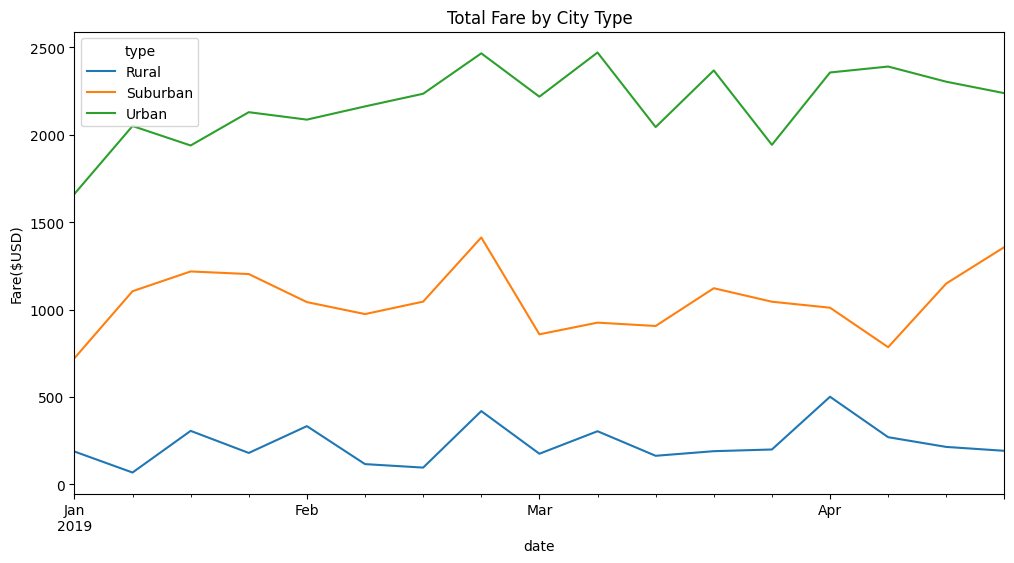

In [28]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

ax=date_range_week.plot( title="Total Fare by City Type",figsize=(12,6))
ax.set_ylabel("Fare($USD)")


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("PyBer_fare_summary.png")
